### Autograd: Engine in pytorch to automatically compute gradients for backpropogation

Simple one layer NN

Gradients are required for w and b, so we set the requires_grad=True for those tensors

In [31]:
import torch
import matplotlib.pyplot as plt
import math

In [ ]:

#input tensor
x = torch.ones(5)

#output
y = torch.zeros(3)

w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w) + b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [2]:
loss

tensor(0.5478, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)

Computation Graph for this operation is

Reference to grad object of z

In [3]:
z.grad_fn


In [4]:
loss.grad_fn

Partial derivatives of loss, wrt w and b

∂loss/∂w and ∂loss/∂b under some fixed values of x and y

In [5]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.0123, 0.2486, 0.0700],
        [0.0123, 0.2486, 0.0700],
        [0.0123, 0.2486, 0.0700],
        [0.0123, 0.2486, 0.0700],
        [0.0123, 0.2486, 0.0700]])
tensor([0.0123, 0.2486, 0.0700])


##### We can get grad properties for only leaf nodes of the computational graph

Disable Gradient Tracking

In [6]:
with torch.no_grad():
    z = torch.matmul(x, w)+b
z.requires_grad

False

In [7]:
z = torch.matmul(x, w)+b
z_det = z.detach()
z_det.requires_grad

False

- This can be used to freeze cetain params while finetuning a pretrained model
- Also, when only forward pass is req

- Autograd keeps a record of tensor and all executed operations in a DAG
- Leaves are input tensors and root is output tensor
- Tracing from root to leaves, gradients can be computed using chain rule

Autograd Test

In [35]:
a = torch.linspace(0, 2*math.pi, steps=25, requires_grad=True)
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

In [36]:
b = torch.sin(a)
b

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)

In [37]:
c = 2 * b
d = c + 1
d

tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)

Output for autograd gradient computation must be scalar value

In [38]:
out = d.sum()
out

tensor(25., grad_fn=<SumBackward0>)

Each computation is stored by grad_fn. Allows walking back to the input tensor.

In [39]:
print(out.grad_fn)
print(out.grad_fn.next_functions)
print(out.grad_fn.next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(out.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)


((<AddBackward0 object at 0x7fcdc2f6e230>, 0),)
((<MulBackward0 object at 0x7fcdc2f6f8b0>, 0), (None, 0))
((<SinBackward0 object at 0x7fcdc2f6faf0>, 0), (None, 0))
((<AccumulateGrad object at 0x7fcdc2f6f8b0>, 0),)


Compute Gradient

In [40]:
out.backward()

Gradient is stored in input's grad property

In [41]:
a

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


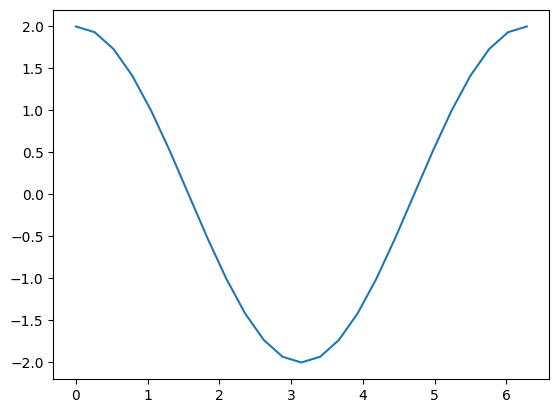

In [44]:
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Autograd in a NN

In [67]:
BATCH_SIZE = 16
IN_DIM = 1000
HIDDEN_DIM = 100
OUT_DIM = 10

class TestModel(torch.nn.Module):

    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(self.relu(x))
        x = self.layer2(x)
        return x

In [68]:
input = torch.rand(BATCH_SIZE, IN_DIM, requires_grad=True)
output = torch.rand(BATCH_SIZE, OUT_DIM, requires_grad=True)

model = TestModel()

In [69]:
(model.layer1.weight[0].shape)

torch.Size([1000])

In [70]:
model.layer2.weight[0]

tensor([-0.0056,  0.0228, -0.0804, -0.0882,  0.0235, -0.0683,  0.0990,  0.0009,
        -0.0919, -0.0462,  0.0224,  0.0998,  0.0412,  0.0206,  0.0154,  0.0835,
         0.0832,  0.0069,  0.0948,  0.0909,  0.0186,  0.0742,  0.0858, -0.0622,
        -0.0062,  0.0445,  0.0493, -0.0912, -0.0962, -0.0141,  0.0177,  0.0014,
        -0.0616,  0.0319, -0.0859, -0.0379, -0.0267, -0.0659,  0.0504,  0.0546,
         0.0653,  0.0255, -0.0477, -0.0651,  0.0997,  0.0156,  0.0557, -0.0640,
         0.0015, -0.0915,  0.0598,  0.0637,  0.0668, -0.0346, -0.0794, -0.0167,
         0.0448,  0.0093,  0.0924, -0.0444,  0.0909, -0.0951, -0.0600, -0.0215,
        -0.0383, -0.0352, -0.0647, -0.0489,  0.0244, -0.0380,  0.0755, -0.0372,
        -0.0239, -0.0676,  0.0556,  0.0583, -0.0061,  0.0636,  0.0481, -0.0312,
        -0.0849,  0.0894, -0.0486,  0.0535, -0.0817,  0.0346, -0.0215,  0.0611,
        -0.0869, -0.0820, -0.0791, -0.0630, -0.0347, -0.0726,  0.0779, -0.0990,
        -0.0148,  0.0071, -0.0620, -0.08

In [71]:
model.layer1.weight.grad

### Loss and Optimizer

In [72]:
label = torch.rand(BATCH_SIZE, OUT_DIM)

In [73]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

pred = model(input)
loss = ((pred - label)**2).sum()

In [74]:
loss.backward()

In [77]:
print(model.layer2.weight.grad[0])

tensor([ 3.3038,  0.0714, -2.5615, -0.0545, -1.8378,  0.6396, -2.6217,  0.7085,
        -2.1604,  2.4438, -0.4341, -2.5471,  0.8466, -1.4724,  2.3822,  2.0183,
        -0.3310, -2.4159, -4.7160,  0.0938, -1.8356, -1.3907,  1.3814, -2.4925,
        -3.1633,  0.7442,  0.1743, -0.2867,  0.9257,  1.9771, -1.9243,  4.3873,
         1.7689,  1.4346, -0.7212,  0.4498,  1.3191, -2.6351, -1.9039, -3.1572,
        -2.2550, -2.3247,  1.9735, -0.6701,  1.1000,  1.4406,  0.3933,  1.1733,
         0.1960,  0.8506, -0.7878,  0.0665,  0.6248, -2.7735, -0.7687,  2.4577,
         2.8372, -2.8095, -3.2394,  0.0065, -0.9681, -2.2876,  2.8305, -1.2178,
         4.3755, -2.4037, -0.5579, -2.3732,  1.2081, -3.8286, -2.2530,  3.2775,
         0.6181,  0.8639,  0.9787, -0.1202,  1.6534,  1.5799,  0.8366,  1.8908,
        -0.9636, -3.7135,  0.6607, -2.4769,  1.1223, -2.8473,  1.2085, -1.5461,
         1.7043,  0.2704, -1.9508, -1.8908,  0.8851,  0.1497, -0.2090,  0.4092,
         0.3177,  3.1322, -0.7211,  0.93

Update the parameters

In [78]:
optimizer.step()
print(model.layer2.weight[0])

tensor([-0.0089,  0.0227, -0.0778, -0.0882,  0.0253, -0.0689,  0.1016,  0.0001,
        -0.0897, -0.0486,  0.0228,  0.1023,  0.0403,  0.0220,  0.0130,  0.0815,
         0.0835,  0.0093,  0.0995,  0.0908,  0.0204,  0.0756,  0.0844, -0.0597,
        -0.0030,  0.0438,  0.0491, -0.0909, -0.0971, -0.0161,  0.0197, -0.0030,
        -0.0634,  0.0305, -0.0851, -0.0384, -0.0280, -0.0633,  0.0523,  0.0577,
         0.0676,  0.0278, -0.0496, -0.0644,  0.0986,  0.0141,  0.0553, -0.0652,
         0.0013, -0.0923,  0.0606,  0.0637,  0.0662, -0.0319, -0.0786, -0.0191,
         0.0420,  0.0122,  0.0957, -0.0444,  0.0918, -0.0928, -0.0628, -0.0203,
        -0.0427, -0.0328, -0.0641, -0.0465,  0.0232, -0.0341,  0.0778, -0.0405,
        -0.0245, -0.0685,  0.0547,  0.0584, -0.0078,  0.0621,  0.0472, -0.0331,
        -0.0839,  0.0931, -0.0493,  0.0560, -0.0829,  0.0375, -0.0227,  0.0627,
        -0.0887, -0.0823, -0.0771, -0.0611, -0.0356, -0.0728,  0.0781, -0.0994,
        -0.0151,  0.0040, -0.0613, -0.08

Zero the gradient or else it will get accumulated in next step

In [79]:
optimizer.zero_grad()